In [ ]:
Flask WTF

WTF stands for Web Toolkit Forms. It was called as a WT Forms.

WTF, which is intended to the interactive user interface for the user. The WTF is a built-in module of the flask
which provides the alternative way of designing forms in the flask web applications.

Why WTF is useful?

1) The form elements are sent along with the request object from the client-side to the server-side. Server side scripts
    needs to recreate the form elements since there is no direct mapping between client-side form elements and variables to
    be used at the server-side.
2) There is no way to render the HTML form data at real time.

WT Forms are flexible, form rendering and validation library used to provide the user interface.

__________________________________________________________________________________________________________________________________
| SNO |       Form-Field              | Description                                                                              |
|_____|_______________________________|__________________________________________________________________________________________|
| 1   |  TextField                    | It is used to represent the text field in the html form element.                         |
|_____|_______________________________|__________________________________________________________________________________________|
| 2   |  BooleanField                 | It is used to represent the checkbox in the html form element.                           |
|_____|_______________________________|__________________________________________________________________________________________|
| 3   |  DecimalField                 | It is used to represent the text field to display the numbers with decimals.             |
|_____|_______________________________|__________________________________________________________________________________________|
| 4   |  IntegerField                 | It is used to represent the text field to display the integer values.                    |
|_____|_______________________________|__________________________________________________________________________________________|
| 5   |  RadioField                   | It is used to represent radio values in the html form element.                           |
|_____|_______________________________|__________________________________________________________________________________________|
| 6   |  SelectField                  | It is used to represent the select from the element.                                     |
|_____|_______________________________|__________________________________________________________________________________________|
| 7   |  Text-areaField               | It is used to represent the text area from the element.                                  |
|_____|_______________________________|__________________________________________________________________________________________|
| 8   |  PasswordField                | It is used to take the password as the form imput from the user.                         |
|_____|_______________________________|__________________________________________________________________________________________|
| 9   |  SubmitField                  | It provides represents the <input type='submit' value='submit'> html form element.       |
|_____|_______________________________|__________________________________________________________________________________________|

In [2]:
pip install wtf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wtf: filename=wtf-0.1-py3-none-any.whl size=3671 sha256=aedae75ca65675f1fb559df543cabee33f894cd0b5327b5d22fcafdecef96473
  Stored in directory: c:\users\intel 89\appdata\local\pip\cache\wheels\29\e5\a1\1f3f87ce6db95d95a83c72a852950ebbe186566a6b13ffe75b
Successfully built wtf
Note: you may need to restart the kernel to use updated packages.


In [3]:
from flask_wtf import Form
from wtf import TextField,BooleanField,DecimalField,IntegerField,RadioField,SelectField,TextAreaField,PasswordField,SubmitField
from wtf import validators,ValidationError
class ContactForm(Form):
    name=TextField('Name',[validators.required('Please Enter your name')])
    gender=RadioField('Gender',choices=[('M','Male'),('F','Female')])
    Address=TextAreaField('Address')
    email=TextField('email',[validators.required('Please Enter your email')])
    validators.Email('Please confirm your email address')
    Age=IntegerField('Age')
    language=SelectField('Programming Languages',choices=[('java','Java'),('python','Python')])
    submit=SubmitField("submit")

ImportError: cannot import name 'TextField' from 'wtf' (C:\Users\INTEL 89\anaconda3\Lib\site-packages\wtf\__init__.py)

In [ ]:
in Latest version we use StringField instead of TextField and importing FlaskForm instead of Form.

In [12]:
from flask_wtf import FlaskForm
from wtforms import StringField, BooleanField, DecimalField, IntegerField, RadioField, SelectField, TextAreaField, PasswordField, SubmitField
from wtforms import validators, ValidationError

class ContactForm(FlaskForm):
    name=StringField('Name',[validators.DataRequired('Please Enter your name')])
    gender=RadioField('Gender',choices=[('M','Male'),('F','Female')])
    address=TextAreaField('Address')
    email=StringField('email',[validators.DataRequired('Please Enter your email')])
    validators.Email('Please confirm your email address')
    age=IntegerField('Age')
    language=SelectField('Programming Languages',choices=[('java','Java'),('python','Python')])
    submit=SubmitField("submit")
#save in forms.py

In [ ]:
above code is used to how the class will be created. it will used for further steps.
the further steps are now we create html codes in templates folder and by using flask app we will see output in the web page.


i will tell clearly
first create a folder and save with filename like Flask
in Flask folder save two python codes with .py files above code as forms.py and below code as wtf.py
after that create a templates folder in Flask app, name as only templates is must and should.
In templates folder save contact and success html files.
run the program.

In [14]:
from flask import *
from forms import ContactForm
app=Flask(__name__)
app.secret_key='abc'
@app.route('/',methods=['GET','POST'])
def contact():
    form=ContactForm()
    if form.validate==False:
        flash('All Fields are Required')
    return render_template('contact.html',form=form)
@app.route('/success',methods=['GET','POST'])
def success():
    return render_template('success.html')
if __name__=='__main__':
    app.run(port=5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
127.0.0.1 - - [19/Sep/2024 18:17:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2024 18:17:21] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [19/Sep/2024 18:17:55] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2024 18:20:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2024 18:21:44] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2024 18:22:32] "POST /success HTTP/1.1" 200 -


In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>contact</title>
    </head>
    <body>
        <h1 style="text-align : center;">Registration Form</h1>
        {% for meaasge in form.name.errors %}
          <div> {{message}} </div>
        {% endfor %}
        {% for message in form.email.errors %}
          <div> {{messages}} </div>
        {% endfor %}
        <form action='{{url_for('success')}}' method='post'>
            {{form.hidden_tag()}}
            <fieldstyle style="font-size:18px; font-weight:bold; margin-left:150px">
                <div>
                    {{form.name.label  }}<br>
                    {{form.name  }}
                    <br><br>
                    {{form.gender.label  }}<br>
                    {{form.gender  }}
                    <br><br>
                    {{form.address.label  }}<br>
                    {{form.address  }}
                    <br><br>
                    {{form.email.label  }}<br>
                    {{form.email  }}
                    <br><br>
                    {{form.age.label  }}<br>
                    {{form.age  }}
                    <br><br>
                    {{form.language  }}<br>
                    {{form.language  }}
                    <br><br>
                    {{form.submit  }}
                </div>
            </fieldset>
        </form>
    </body>
</html>

save in contact.html

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>success</title>
    </head>
    <body>
        <h1>form posted successfully</h1>
    </body>
</html>

save in success.html

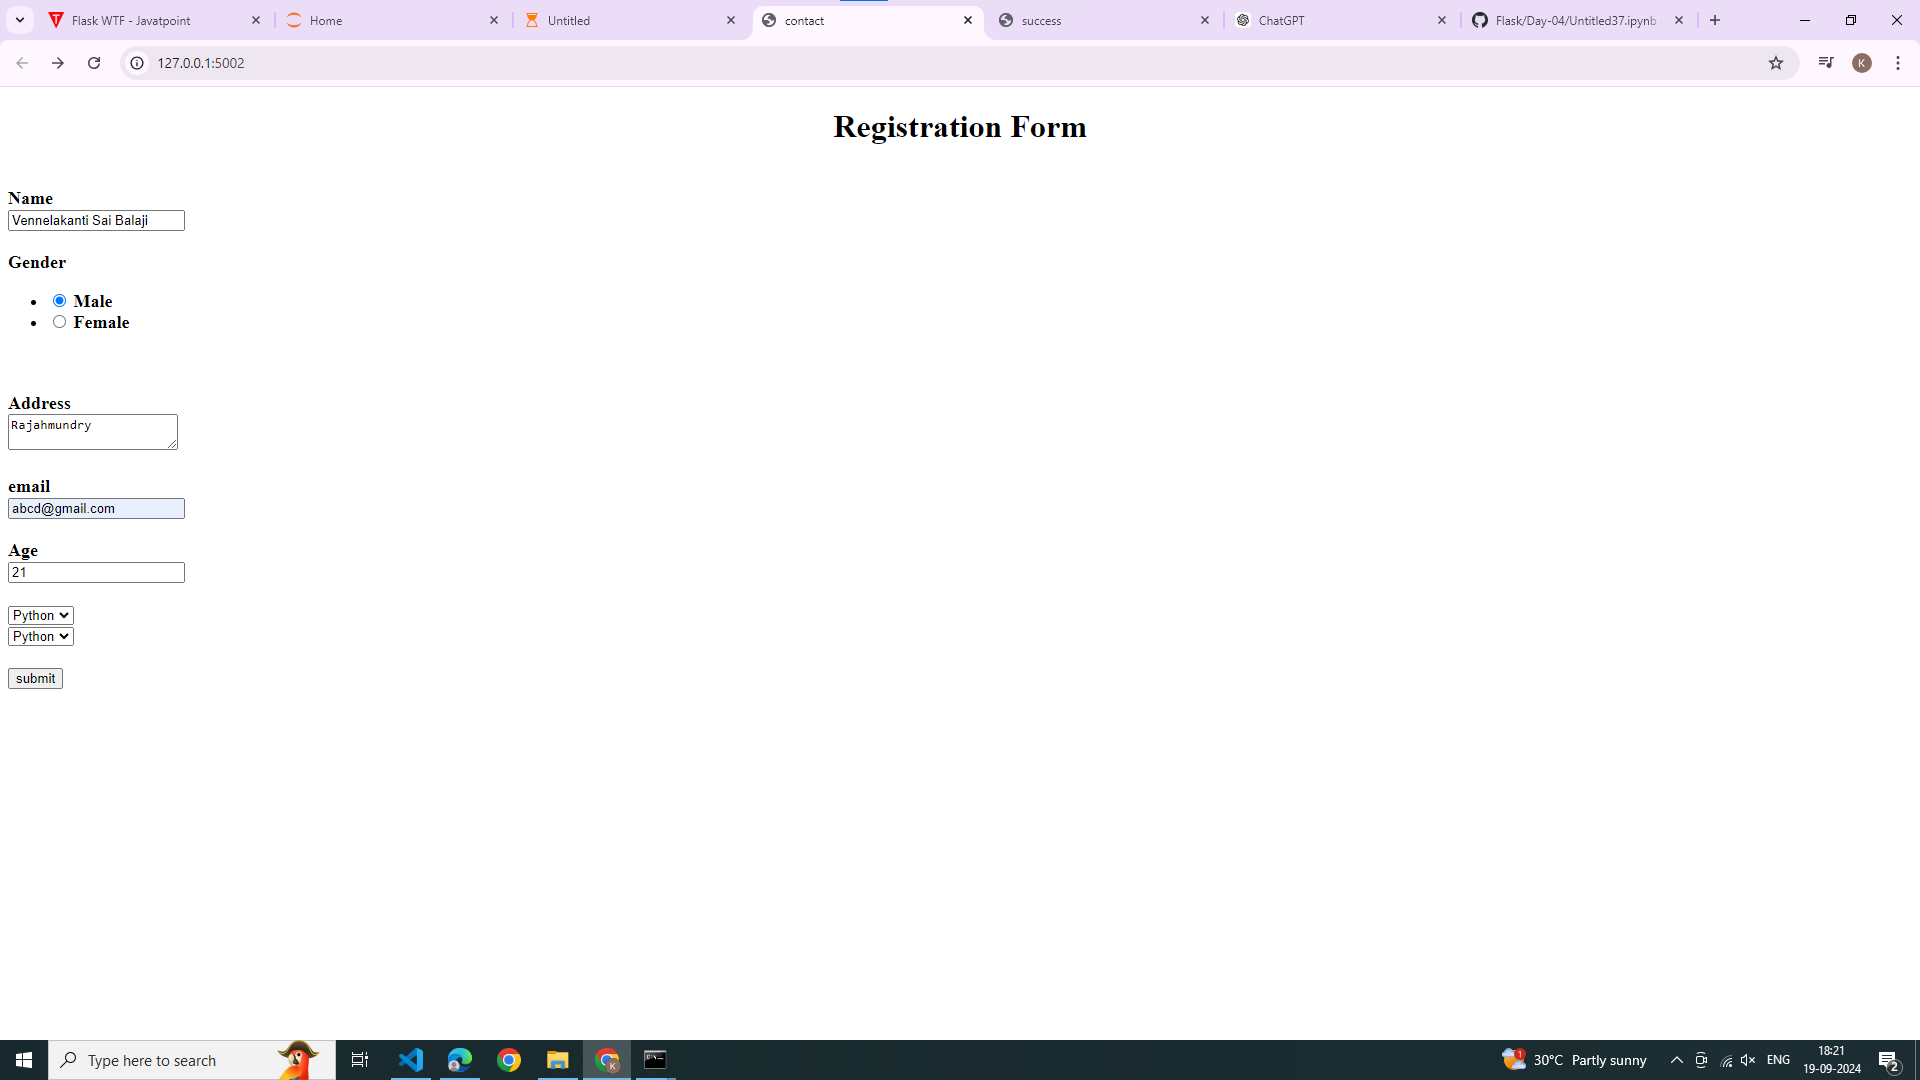

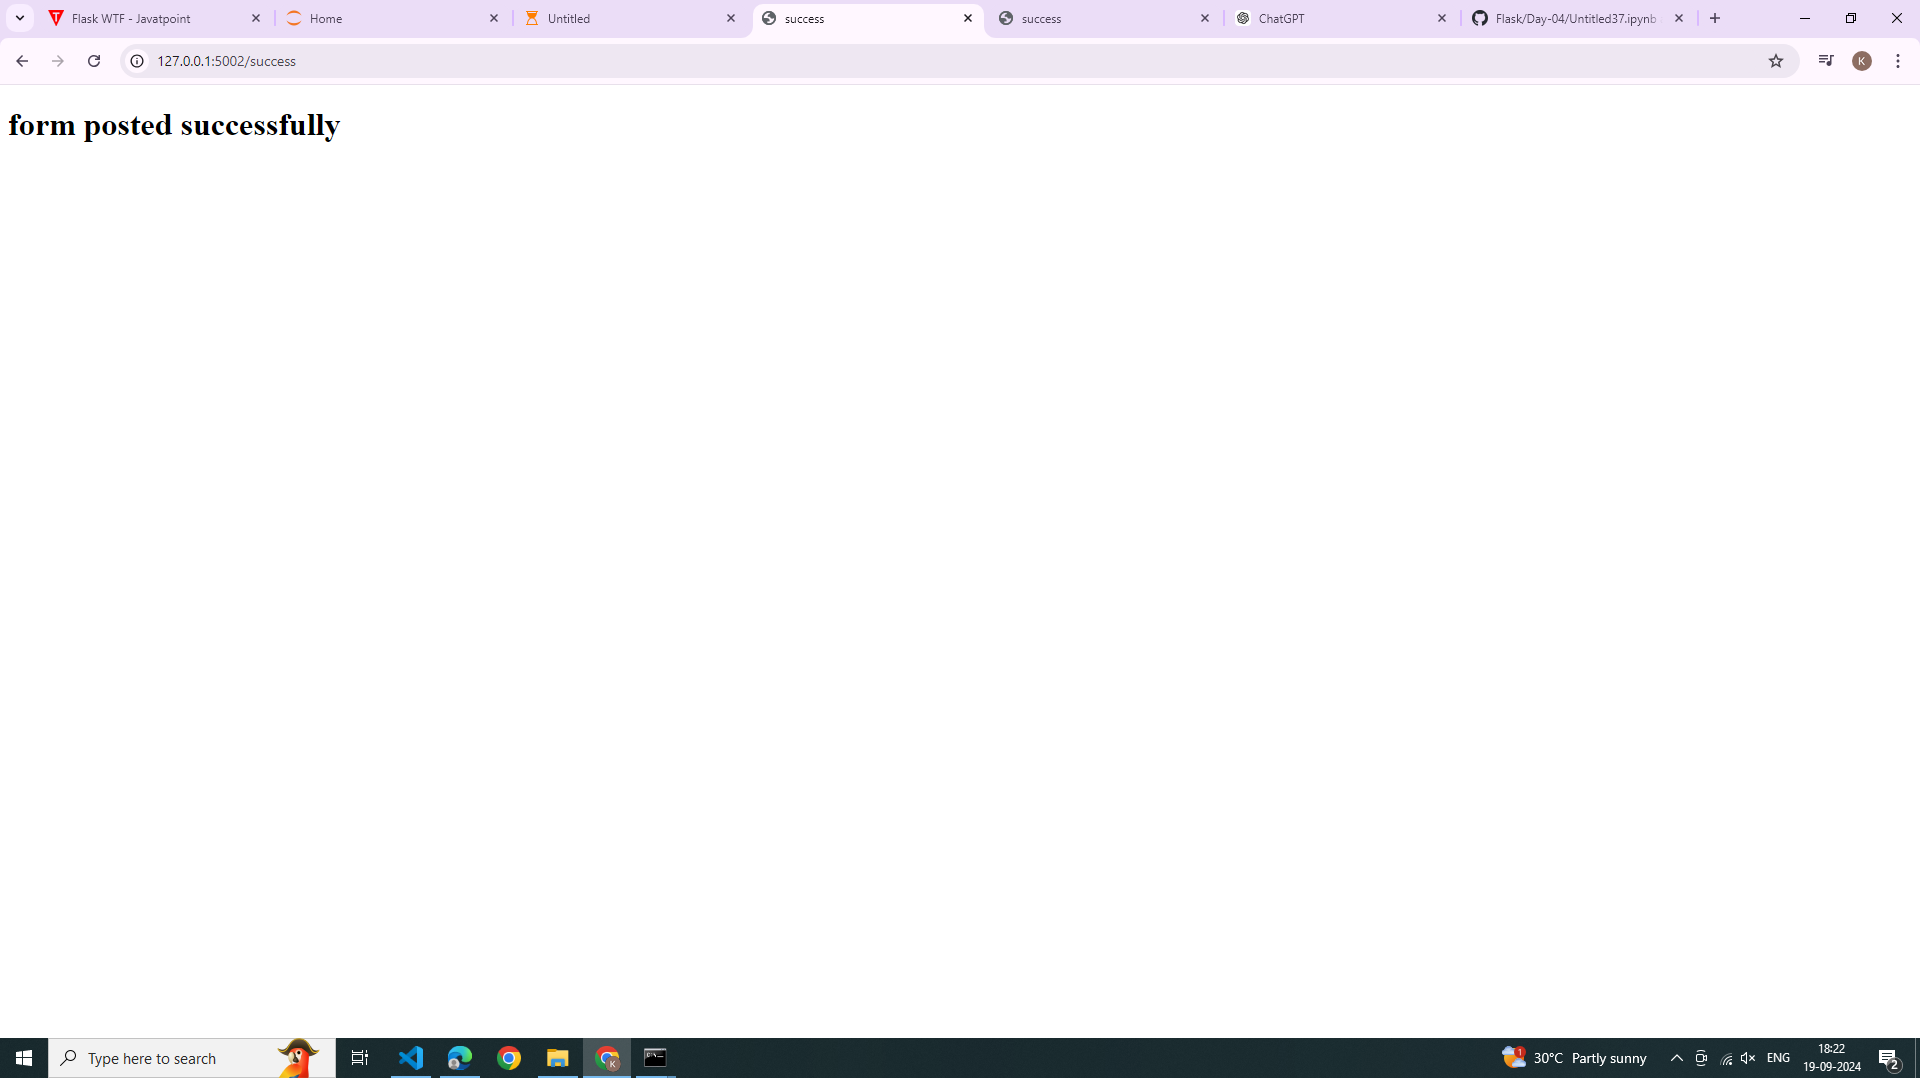

In [15]:
from IPython.display import Image,display
a=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-19 182200.png"
b=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-19 182242.png"
display(Image(filename=a))
display(Image(filename=b))

In [ ]:
Hence these are the main topics of Flask.